In [1]:
import sys

#import Kalpana functions from github repository
# change these to your own paths!
sys.path.append('/Users/vivianhuang/Documents/GitHub/Kalpana')
from kalpana.export import *
from kalpana.visualizations import *
import contextily as cx

Following the idea of /Kalpana/examples/export_example01.ipynb and /Kalpana/kalpana/visualizations.py, 

### we plot the graph for our maxele.63.nc file.

In [2]:
#plot the maximum water levels from a given maxele.63.nc file

## path to netcdf file
### netcdf is just a way to store datasets
nc_path = '/Users/vivianhuang/Documents/GitHub/Kalpana/examples/test/maxele.63.nc' 
nc = netcdf.Dataset(nc_path, 'r')
#check if this netcdf file looks right
print(nc)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    _FillValue: -99999.0
    model: ADCIRC
    version: v55.00-49-ga2c71f6
    grid_type: Triangular
    description: CTXCS_TP_0012_HIS                         ! 32 CHARACTER ALPHANUMERIC RUN DESCRI
    agrid: Modified fort.14
    rundes: CTXCS_TP_0012_HIS                         ! 32 CHARACTER ALPHANUMERIC RUN DESCRI
    runid: Tides_1_SLC_0_RFC_0_WAV_1_GCP_CTX61LE02                          ! 24 CHARACTER
    title: namo
    institution: namo
    source: namo
    history: namo
    references: namo
    comments: namo
    host: namo
    convention: namo
    Conventions: UGRID-0.9.0
    contact: namo
    creation_date: 2023-03-23 14:52:27 -05:00
    modification_date: 2023-03-23 14:52:27 -05:00
    fort.15: ==== Input File Parameters (below) ====
    dt: 0.125
    ihot: 0
    ics: 2
    nolibf: 1
    nolifa: 2
    nolica: 1
    nolicat: 1
    nwp: 7
    ncor: 1
    ntip: 0
    nws: 0
    nra

#### the dimensions(sizes) information tells us what fields are contained


#### Let's read a few of the fields

In [3]:
print(nc['zeta_max'].shape)
print(nc['x'].shape)
print(nc['x'][0])
print(nc['y'].shape)
print(nc['element'].shape)
print(nc['element'][0])

print(nc['element'][:,:] - 1) # to explain what the -1 brings in the later plotting section
print(nc['element'][:,:] ) # ADCIRC and python have different ways to index. -1 is to align the indexing system

(62075,)
(62075,)
-93.863236
(62075,)
(122839, 3)
[2 1 3]
[[    1     0     2]
 [    5     4     1]
 [    1     2     5]
 ...
 [62071 62069 62073]
 [62074 62071 62073]
 [62074 62072 62071]]
[[    2     1     3]
 [    6     5     2]
 [    2     3     6]
 ...
 [62072 62070 62074]
 [62075 62072 62074]
 [62075 62073 62072]]


From the output of the last block, we can have a feeling of how data is stored in the netCDF file:


(1) the x and y values are the coordinates of the nodes. (the nodes in the mesh)  x = [x-coordinate of node 1, x-coordinate of node 2,x-coordinate of node 3, ...]


(2) the zeta_max is the maximum water level, and this value is taken and stored at each node.


(3) the element array is an array of triangles which defines how the nodes in the mesh are connected. Three nodes form a triangle. The example [2 1 3] means the nodes 2, 1, and 3 form a triangle.

### plot the maxele

In [4]:
np.count_nonzero(np.isnan(np.array(nc['zeta_max']))) # check

0

In [5]:
# get the minimum and maximum of nc['zeta_max']
array_zeta_max = np.array(nc['zeta_max']) #turn the netcdf format data to np.array for our convenience. the same effect as nc['zeta_max'][:].data
# since the current minimum value =-99999.0 indicates nan, we mask it out to get the second minimum value as the min
array_zeta_max_1 = np.ma.masked_equal(array_zeta_max, -99999.0)
zeta_max_min = np.min(array_zeta_max_1)

zeta_max_max = np.max(array_zeta_max)
print(zeta_max_min)
print(zeta_max_max)

0.12345086122406665
18.823346528479437


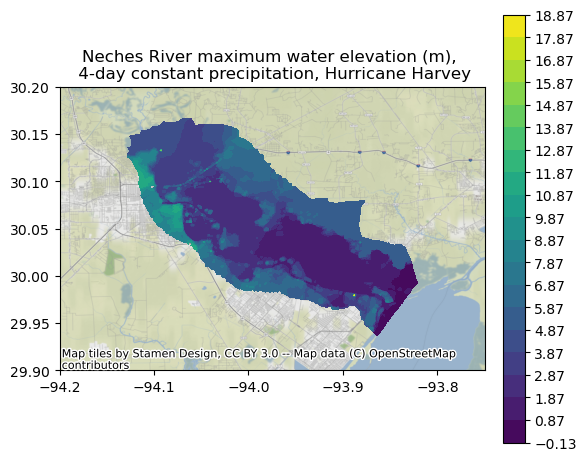

In [6]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.set_xlim([-94.2, -93.75])
ax.set_ylim([29.9, 30.20])
tri = mpl.tri.Triangulation(nc['x'][:].data, nc['y'][:].data, nc['element'][:,:] - 1) #form the triangles
contours = ax.tricontourf(tri, array_zeta_max, levels = np.arange(zeta_max_min-0.25, zeta_max_max+0.25, 1), cmap = 'viridis',cbar = True)
# levels = (minimum, maximum, bin_size)
# I don't know why they -0.25 and +0.25 in the level. I just keep it. This is only for the plotting, and does not vary the actual zeta_max value.

ax.set_title('Neches River maximum water elevation (m), \n 4-day constant precipitation, Hurricane Harvey')

fig.colorbar(contours, extend = 'both', ax = ax, fraction=0.046, pad=0.04, ticks=np.arange(zeta_max_min-0.25, zeta_max_max+0.25, 1))
cx.add_basemap(ax, crs='epsg:4326',zoom=13)

### Now Let's try fort.63.nc

In [7]:
#plot the maximum water levels from a given maxele.63.nc file

## path to netcdf file
### netcdf is just a way to store datasets
nc_path_2 = '/Users/vivianhuang/Documents/GitHub/Kalpana/examples/test/fort.63.nc' 
nc2 = netcdf.Dataset(nc_path_2, 'r')
#check if this netcdf file looks right
print(nc2)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    _FillValue: -99999.0
    model: ADCIRC
    version: v55.00-49-ga2c71f6
    grid_type: Triangular
    description: CTXCS_TP_0012_HIS                         ! 32 CHARACTER ALPHANUMERIC RUN DESCRI
    agrid: Modified fort.14
    rundes: CTXCS_TP_0012_HIS                         ! 32 CHARACTER ALPHANUMERIC RUN DESCRI
    runid: Tides_1_SLC_0_RFC_0_WAV_1_GCP_CTX61LE02                          ! 24 CHARACTER
    title: namo
    institution: namo
    source: namo
    history: namo
    references: namo
    comments: namo
    host: namo
    convention: namo
    Conventions: UGRID-0.9.0
    contact: namo
    creation_date: 2023-03-23 14:52:27 -05:00
    modification_date: 2023-03-23 14:52:27 -05:00
    fort.15: ==== Input File Parameters (below) ====
    dt: 0.125
    ihot: 0
    ics: 2
    nolibf: 1
    nolifa: 2
    nolica: 1
    nolicat: 1
    nwp: 7
    ncor: 1
    ntip: 0
    nws: 0
    nra

### This time we have 384 time slices (comparing to the maxele, we only have 1).

In [8]:
print(nc2['zeta'].shape)
print(nc2['x'].shape)
print(nc2['x'][0])
print(nc2['y'].shape)
print(nc2['element'].shape)
print(nc2['element'][0])

(384, 62075)
(62075,)
-93.863236
(62075,)
(122839, 3)
[2 1 3]


Plotting the graph for a single time slice is easy. We can recycle our previous code

In [9]:
time_to_plot = 0 #select an int between 0 and 383

In [10]:
np.count_nonzero(np.isnan(np.array(nc2['zeta'][time_to_plot]))) # check
# get the minimum and maximum of nc['zeta_max']
array_zeta = np.array(nc2['zeta'][time_to_plot]) #turn the netcdf format data to np.array for our convenience. the same effect as nc['zeta_max'][:].data
# since the current minimum value =-99999.0 indicates nan, we mask it out to get the second minimum value as the min
array_zeta_1 = np.ma.masked_equal(array_zeta, -99999.0)
zeta_min = np.min(array_zeta_1)

zeta_max = np.max(array_zeta)
print(zeta_min)
print(zeta_max)
bin_value = np.minimum((zeta_max-zeta_min)/10,1.0)
print(bin_value)

-0.014343743602736252
0.16892507123994177
0.018326881484267803


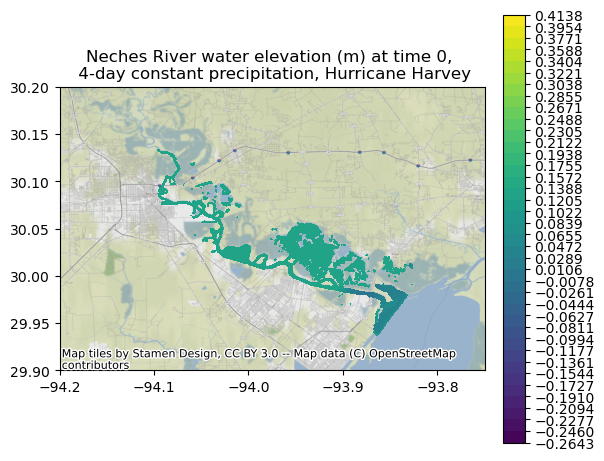

In [11]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.set_xlim([-94.2, -93.75])
ax.set_ylim([29.9, 30.20])
tri = mpl.tri.Triangulation(nc['x'][:].data, nc['y'][:].data, nc['element'][:,:] - 1) #form the triangles, the same triangles as used in previous plot
contours2 = ax.tricontourf(tri, array_zeta, levels = np.arange(zeta_min-0.25, zeta_max+0.25, bin_value), cmap = 'viridis',cbar = True)

ax.set_title('Neches River water elevation (m) at time %i, \n 4-day constant precipitation, Hurricane Harvey'%time_to_plot)
fig.colorbar(contours2, extend = 'both', ax = ax, fraction=0.046, pad=0.04, ticks=np.arange(zeta_min-0.25, zeta_max+0.25, bin_value))
cx.add_basemap(ax, crs='epsg:4326',zoom=13)

[ 1.0000e+00  1.0000e+00  1.0000e+00 ... -9.9999e+04 -9.9999e+04
 -9.9999e+04]
[ 1.26192511e-01  1.07046679e-01  1.24016299e-01 ... -9.99990000e+04
 -9.99990000e+04 -9.99990000e+04]


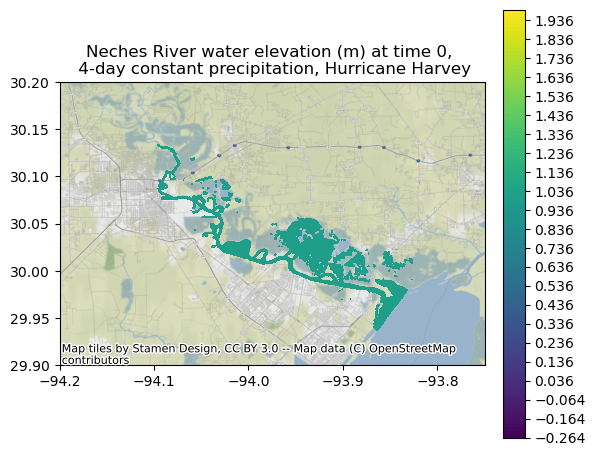

In [40]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.set_xlim([-94.2, -93.75])
ax.set_ylim([29.9, 30.20])
array_zeta_try = np.ones(62075)* -99999.0
array_zeta_try[array_zeta > -99999.0]=1
print(array_zeta_try)
print(array_zeta)
tri = mpl.tri.Triangulation(nc['x'][:].data, nc['y'][:].data, nc['element'][:,:] - 1) #form the triangles, the same triangles as used in previous plot
contours2 = ax.tricontourf(tri, array_zeta_try, levels = np.arange(zeta_min-0.25, 2, bin_value), cmap = 'viridis',cbar = True)

ax.set_title('Neches River water elevation (m) at time %i, \n 4-day constant precipitation, Hurricane Harvey'%time_to_plot)
fig.colorbar(contours2, extend = 'both', ax = ax, fraction=0.046, pad=0.04, ticks=np.arange(zeta_min-0.25, 2, 0.1))
cx.add_basemap(ax, crs='epsg:4326',zoom=13)

#### you can choose to plot the slice taken at other time

## Compute Water Stagnated Duration


We can take the 'zeta' array out from fort.63.nc, and compute the water stagnated duration for each node in the mesh.


#### (1) For each time slice, we create a boolean array with 1 indicating water occupy the node, and 0 for no water at the node.

#### (2) We create a new empty python list of the length of the number of nodes. 

#### (3) create a new python list water_list. Each item in the list represent a node. If water never stagnate at a given node, it has [nan]. Otherwise, the item records a list of [time_index of the first time slice, time_index of the water disappearing time slice] for each stagnation period for that node.

#### (3) We iterate over all time slices and location to fill out the water_list.

In [41]:
#all_zeta = np.array(nc2['zeta'])!= -99999.0
all_zeta = np.array(nc2['zeta'])
time_index = 0
storage_array = np.zeros(62075)
water_list = [[np.nan] for _ in range(62075)] 
time_slice_length = 383

# in storage_array, 0 means no water at a node, 
# the non-zero value is the (time_index + 1) of the first time slice in this stagnated duration.
# we fix the (time_index+1) issue when storing the final values in the water_list.

In [42]:
# not the best way to write it. 2 loops. but it can work. so leave it here for now...
while time_index < time_slice_length: #go through all the time slices
    for location_index in range(62075):
        if storage_array[location_index] ==0:
            if all_zeta[time_index][location_index]> -99999.0:
                #if this node doesn't have any water (0) before but has water this time, we record this time index in the storage array at corresponding nodes
                storage_array[location_index]=time_index+1.0
            #if this node doesn't have any water (0) before and doesn't have water this time, we do nothing
        else:
            if not all_zeta[time_index][location_index]> -99999.0:
                #if this node has water before but has no water this time
                # we record the time_index of the first time water appear and disappear in the water_list
                if water_list[location_index] == [np.nan]:
                    water_list[location_index] = [[storage_array[location_index]-1.0,time_index]]
                else:
                    water_list[location_index].append([storage_array[location_index]-1.0,time_index])
                # and reset the storage array
                storage_array[location_index]=0
            #if this node has water before and has water this time, we do nothing
    time_index = time_index + 1

# for the last slice, we clean up
time_index = time_slice_length
for location_index in range(62075):
    if storage_array[location_index] ==0:
        if all_zeta[time_index][location_index]> -99999.0:
            #if this node doesn't have any water (0) before but has water this time
            # we record the time_index of the first time water appear and disappear in the water_list
            if water_list[location_index] == [np.nan]:
                water_list[location_index] = [[storage_array[location_index]-1.0,time_index]]
            else:
                water_list[location_index].append([storage_array[location_index]-1.0,time_index])
        #if this node doesn't have any water (0) before and doesn't have water this time, we do nothing
    else:
        if not all_zeta[time_index][location_index]> -99999.0:
            #if this node has water before but has no water this time
            # we record the time_index of the first time water appear and disappear in the water_list
            if water_list[location_index] == [np.nan]:
                water_list[location_index] = [[storage_array[location_index]-1.0,time_index]]
            else:
                water_list[location_index].append([storage_array[location_index]-1.0,time_index])
        #if this node has water before and has water this time, we do nothing


In [43]:
# # not the best way to write it. 2 loops. but it can work. so leave it here for now...
# while time_index < time_slice_length: #go through all the time slices
#     for location_index in range(62075):
#         if storage_array[location_index] ==0:
#             if all_zeta[time_index][location_index]:
#                 #if this node doesn't have any water (0) before but has water this time, we record this time index in the storage array at corresponding nodes
#                 storage_array[location_index]=time_index+1.0
#             #if this node doesn't have any water (0) before and doesn't have water this time, we do nothing
#         else:
#             if not all_zeta[time_index][location_index]:
#                 #if this node has water before but has no water this time
#                 # we record the time_index of the first time water appear and disappear in the water_list
#                 if water_list[location_index] == [np.nan]:
#                     water_list[location_index] = [[storage_array[location_index]-1.0,time_index]]
#                 else:
#                     water_list[location_index].append([storage_array[location_index]-1.0,time_index])
#                 # and reset the storage array
#                 storage_array[location_index]=0
#             #if this node has water before and has water this time, we do nothing
#     time_index = time_index + 1

# # for the last slice, we clean up
# time_index = time_slice_length
# for location_index in range(62075):
#     if storage_array[location_index] ==0:
#         if all_zeta[time_index][location_index]:
#             #if this node doesn't have any water (0) before but has water this time
#             # we record the time_index of the first time water appear and disappear in the water_list
#             if water_list[location_index] == [np.nan]:
#                 water_list[location_index] = [[storage_array[location_index]-1.0,time_index]]
#             else:
#                 water_list[location_index].append([storage_array[location_index]-1.0,time_index])
#         #if this node doesn't have any water (0) before and doesn't have water this time, we do nothing
#     else:
#         if not all_zeta[time_index][location_index]:
#             #if this node has water before but has no water this time
#             # we record the time_index of the first time water appear and disappear in the water_list
#             if water_list[location_index] == [np.nan]:
#                 water_list[location_index] = [[storage_array[location_index]-1.0,time_index]]
#             else:
#                 water_list[location_index].append([storage_array[location_index]-1.0,time_index])
#         #if this node has water before and has water this time, we do nothing


In [44]:
# see how it works
for i in range(200):
    if water_list[i]!=[np.nan]:
        print(water_list[i])

[[317.0, 356]]
[[317.0, 356]]
[[317.0, 326]]
[[317.0, 318]]
[[317.0, 318]]
[[317.0, 356]]
[[317.0, 318], [319.0, 321], [325.0, 326]]
[[317.0, 319], [325.0, 326]]
[[317.0, 318], [319.0, 320], [325.0, 326]]
[[317.0, 318]]
[[317.0, 318]]
[[317.0, 318], [319.0, 321], [325.0, 326]]
[[317.0, 318], [320.0, 321], [325.0, 326]]
[[317.0, 318]]
[[317.0, 319], [320.0, 321]]
[[317.0, 319], [325.0, 326]]
[[320.0, 321]]
[[317.0, 318], [325.0, 326]]
[[317.0, 318]]


### now, we can plot a graph indicating where we have water stagnated for more than 10 time slices.

In [45]:
background_array = np.ones(62075)*-99999.0

for i in range(62075):
    if water_list[i]!=[np.nan]:
        for list in water_list[i]:
            background_array[i]=np.maximum(background_array[i],list[1]-list[0]) # give it value 1.0. we can change it to whatever we like

            # if list[1]-list[0]>10:
            #     background_array[i]=np.maximum(background_array[i],list[1]-list[0]) # give it value 1.0. we can change it to whatever we like


In [46]:
print(np.min(background_array))
print(np.max(background_array))

-99999.0
384.0


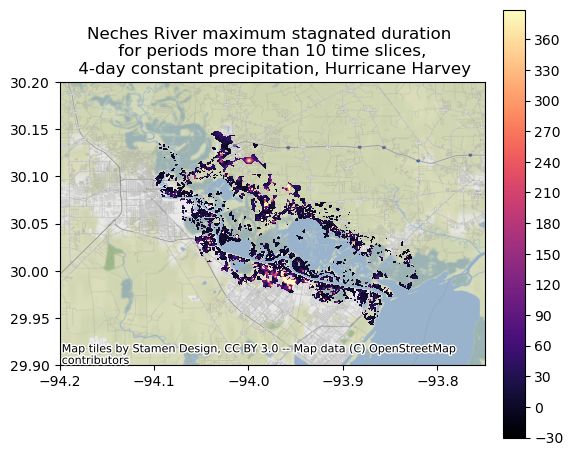

In [49]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.set_xlim([-94.2, -93.75])
ax.set_ylim([29.9, 30.20])
tri = mpl.tri.Triangulation(nc['x'][:].data, nc['y'][:].data, nc['element'][:,:] - 1) #form the triangles, the same triangles as used in previous plot
contours2 = ax.tricontourf(tri, background_array, levels = np.arange(-30, 390, 1), cmap = 'magma')

ax.set_title('Neches River maximum stagnated duration \n for periods more than 10 time slices, \n 4-day constant precipitation, Hurricane Harvey')
fig.colorbar(contours2, extend = 'both', ax = ax, fraction=0.046, pad=0.04, ticks=np.arange(-30, 390, 30))

cx.add_basemap(ax, crs='epsg:4326',zoom=13)

## if we can plot a graph for an array, we can convert it to a shapefile

In [218]:
## path of the adcirc maxele output file, must be a netcdf file
ncFile = '/Users/vivianhuang/Documents/GitHub/Kalpana/examples/test/maxele.63.nc' 

## The node array to export to shapefile
stagnated = background_array

## Contour levels. Min, Max and Step. Max IS included as in np.arange method. Values must be in vUnitOut vertical unit.
## from 0 to 3 meters (included) every 0.5
levels = [0, 390, 10]



## complete path of the output file (*.shp or *.gpkg)
pathOut = '/Users/vivianhuang/Documents/GitHub/Kalpana/examples/test/stagnated_example.shp' 
 


In [219]:
# we modify the nc2shp function in /kalpana/export.py. 
# Also, since we only have one type of input, we make this function lighter
def nc2shp_stagnated(ncFile, stagnated, levels, pathOut):
    ''' Run all necesary functions to export adcirc outputs as shapefiles.
        Parameters
            ncFile: string
                path of the adcirc output, must be a netcdf file
            levels:list
                Contour levels. Min, Max and Step. Max IS included as in np.arange method.
                Values must be in vUnitOut vertical unit.
            pathout: string
                complete path of the output file (*.shp or *.gpkg)
            
        Returns
            gdf: GeoDataFrame
                gdf with contours

    '''
    
    print('Start exporting adcirc to shape')
    ## read adcirc file
    nc_this = netcdf.Dataset(ncFile, 'r')

    maxmax = np.max(stagnated)
    orgMaxLevel = levels[1]
    stepLevel = levels[2]
    ## list of levels to array
    levels_aux = np.arange(levels[0], np.ceil(maxmax), stepLevel)
    ## given levels will now match the avarege value of each interval    
    levels_aux = levels_aux - stepLevel/2
    levels = levels_aux.copy()
    print(levels)

    nv = nc_this['element'][:,:] - 1 ## triangles starts from 1
    x = nc_this['x'][:].data
    y = nc_this['y'][:].data
    tri = mpl.tri.Triangulation(x, y, nv)
    gdf = filledContours2gpd(tri, stagnated, levels, 4326, levels[2], levels[1], True)
    
    ## save output shape file
    t0 = time.time()
    if pathOut.endswith('.shp'):
        gdf.to_file(pathOut)
    elif pathOut.endswith('.gpkg'):
        gdf.to_file(pathOut, driver = 'GPKG')
    elif pathOut.endswith('.wkt'):
        gdf.to_csv(pathOut)

    return gdf
               

In [220]:
gdf = nc2shp_stagnated(ncFile, stagnated, levels, pathOut)

Start exporting adcirc to shape
[ -5.   5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105. 115. 125.
 135. 145. 155. 165. 175. 185. 195. 205. 215. 225. 235. 245. 255. 265.
 275. 285. 295. 305. 315. 325. 335. 345. 355. 365. 375.]


Compute contours using Dask: 100%|██████████████| 38/38 [00:16<00:00,  2.30it/s]
